In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [14]:
# Ler a planilha CSV
nome_arquivo = 'winequality-white.csv'  # Substitua pelo nome do seu arquivo CSV
df_original = pd.read_csv(nome_arquivo, sep=';')

In [15]:
# Mostrar o cabeçalho das colunas
print("Cabeçalho das Colunas:")
print(df_original.columns)


Cabeçalho das Colunas:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [16]:
# Resumo estatístico de todas as colunas
print("\nResumo Estatístico:")
print(df_original.describe())



Resumo Estatístico:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000         

In [5]:
# Dividir os dados em Treino (75%) e Teste (25%)
treino, teste = train_test_split(df_original, test_size=0.25, random_state=42)


In [6]:
# Nome dos arquivos de treino e teste
nome_treino = 'treino.csv'
nome_teste = 'teste.csv'

In [7]:
# Salvar os DataFrames de treino e teste como arquivos CSV na pasta atual
treino.to_csv(nome_treino, index=False, sep=';')
teste.to_csv(nome_teste, index=False, sep=';')

In [9]:
# Ler as planilhas de treino e teste
df_treino = pd.read_csv(nome_treino, sep=';')
df_teste = pd.read_csv(nome_teste, sep=';')

In [10]:
# Resumo estatístico das colunas para a planilha de treino
print("Resumo Estatístico para Treino:")
print(df_treino.describe())


Resumo Estatístico para Treino:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3673.000000       3673.000000  3673.000000     3673.000000   
mean        6.865369          0.279178     0.333207        6.437912   
std         0.846850          0.101555     0.120126        5.139959   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.380000        9.900000   
max        11.800000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3673.000000          3673.000000           3673.000000  3673.000000   
mean      0.045594            35.182957            138.304111     0.994066   
std       0.021181            16.812714             42.026785     0.003027   
min       0.0090

In [11]:
# Resumo estatístico das colunas para a planilha de teste
print("\nResumo Estatístico para Teste:")
print(df_teste.describe())


Resumo Estatístico para Teste:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1225.000000       1225.000000  1225.000000     1225.000000   
mean        6.823061          0.275433     0.337143        6.252000   
std         0.834402          0.098467     0.123665        4.862163   
min         3.900000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.100000   
75%         7.300000          0.320000     0.390000        9.800000   
max        14.200000          0.760000     0.990000       26.050000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1225.000000          1225.000000           1225.000000  1225.000000   
mean      0.046307            35.683265            138.530204     0.993912   
std       0.023736            17.578886             43.897919     0.002879   
min       0.0140

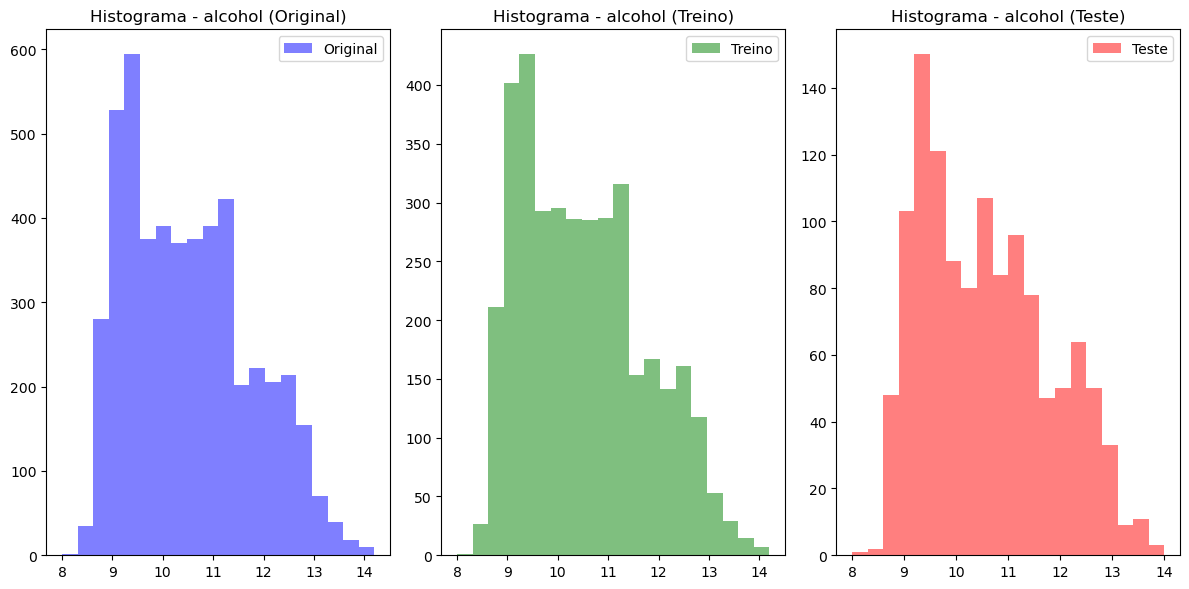

In [19]:
# Gráfico de histograma para uma coluna específica (substitua 'Coluna1' pelo nome da coluna desejada)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(df_original['alcohol'], bins=20, color='blue', alpha=0.5, label='Original')
plt.legend()
plt.title('Histograma - alcohol (Original)')

plt.subplot(1, 3, 2)
plt.hist(df_treino['alcohol'], bins=20, color='green', alpha=0.5, label='Treino')
plt.legend()
plt.title('Histograma - alcohol (Treino)')

plt.subplot(1, 3, 3)
plt.hist(df_teste['alcohol'], bins=20, color='red', alpha=0.5, label='Teste')
plt.legend()
plt.title('Histograma - alcohol (Teste)')

plt.tight_layout()
plt.show()

In [22]:
# Inicialize o objeto StandardScaler
scaler = StandardScaler()

# Ajuste o scaler aos dados de treinamento e transforme-os
treino_preprocessado = scaler.fit_transform(treino.iloc[:, :-1])  # Exclua a coluna alvo da padronização
teste_preprocessado = scaler.transform(teste.iloc[:, :-1])

# Certifique-se de que o conjunto de treinamento e teste ainda contenha as colunas alvo (y)
treino_preprocessado = pd.DataFrame(treino_preprocessado, columns=treino.columns[:-1])
teste_preprocessado = pd.DataFrame(teste_preprocessado, columns=teste.columns[:-1])

In [27]:
# Inicialize o modelo de regressão linear
modelo_ols = LinearRegression()

# Treine o modelo com o conjunto de treinamento
modelo_ols.fit(treino_preprocessado, treino['alcohol'])

# Faça previsões usando o conjunto de teste
previsoes = modelo_ols.predict(teste_preprocessado)

# Calcule a métrica de desempenho (por exemplo, o erro quadrático médio)
mse = mean_squared_error(teste['alcohol'], previsoes)
print("Erro Quadrático Médio:", mse)

Erro Quadrático Médio: 2.0658496195502088e-30


In [26]:
# Função para ajustar o modelo OLS
def ajustar_ols(X, y):
    # Adicione uma coluna de 1s para o termo de viés
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # Calcule os coeficientes usando a fórmula fechada
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return coeficientes

# Função para fazer previsões
def prever_ols(coeficientes, X):
    # Adicione uma coluna de 1s para o termo de viés
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # Calcule as previsões
    previsoes = X @ coeficientes
    
    return previsoes

# Ajuste o modelo OLS aos dados de treinamento
coeficientes_ols = ajustar_ols(treino_preprocessado.to_numpy(), treino['alcohol'].to_numpy())

# Faça previsões usando o conjunto de teste
previsoes_ols = prever_ols(coeficientes_ols, teste_preprocessado.to_numpy())

# Calcule o erro quadrático médio para o modelo OLS implementado do zero
mse_ols = mean_squared_error(teste['alcohol'], previsoes_ols)
print("Erro Quadrático Médio (Implementação do Zero):", mse_ols)

Erro Quadrático Médio (Implementação do Zero): 1.746699036180794e-29


In [30]:
# Função para implementar a validação cruzada do zero
def validacao_cruzada_ols(modelo, X, y, num_folds):
    fold_tamanho = len(X) // num_folds
    rmse_resultados = []
    r2_resultados = []
    
    for fold in range(num_folds):
        inicio = fold * fold_tamanho
        fim = (fold + 1) * fold_tamanho
        X_teste = X[inicio:fim]
        y_teste = y[inicio:fim]
        X_treino = np.concatenate([X[:inicio], X[fim:]])
        y_treino = np.concatenate([y[:inicio], y[fim:]])
        
        modelo.fit(X_treino, y_treino)
        previsoes = modelo.predict(X_teste)
        
        rmse = np.sqrt(mean_squared_error(y_teste, previsoes))
        r2 = r2_score(y_teste, previsoes)
        
        rmse_resultados.append(rmse)
        r2_resultados.append(r2)
    
    return rmse_resultados, r2_resultados

# Realizar a validação cruzada para o modelo OLS implementado do zero
num_folds = 5  # ou 10
rmse_resultados_zero, r2_resultados_zero = validacao_cruzada_ols(modelo_ols, teste_preprocessado.to_numpy(), teste['alcohol'].to_numpy(), num_folds)

# Realizar a validação cruzada para o modelo OLS incorporado
cv_scores = cross_val_score(modelo_ols, teste_preprocessado, teste['alcohol'], cv=num_folds, scoring='neg_mean_squared_error')
rmse_resultados_incorporado = np.sqrt(-cv_scores)

# Comparação entre as métricas RMSE
print("RMSE (Implementação do Zero):", rmse_resultados_zero)
print("RMSE (Implementação Incorporada):", rmse_resultados_incorporado)

# Comparação entre as métricas R²
print("R² (Implementação do Zero):", r2_resultados_zero)
print("R² (Implementação Incorporada):", cross_val_score(modelo_ols, teste_preprocessado, teste['alcohol'], cv=num_folds, scoring='r2'))

RMSE (Implementação do Zero): [1.4840386968539217e-15, 1.2483600313472001e-15, 1.2431908164667597e-15, 9.893591312359478e-16, 2.0895223431124373e-15]
RMSE (Implementação Incorporada): [1.48403870e-15 1.24836003e-15 1.24319082e-15 9.89359131e-16
 2.08952234e-15]
R² (Implementação do Zero): [1.0, 1.0, 1.0, 1.0, 1.0]
R² (Implementação Incorporada): [1. 1. 1. 1. 1.]


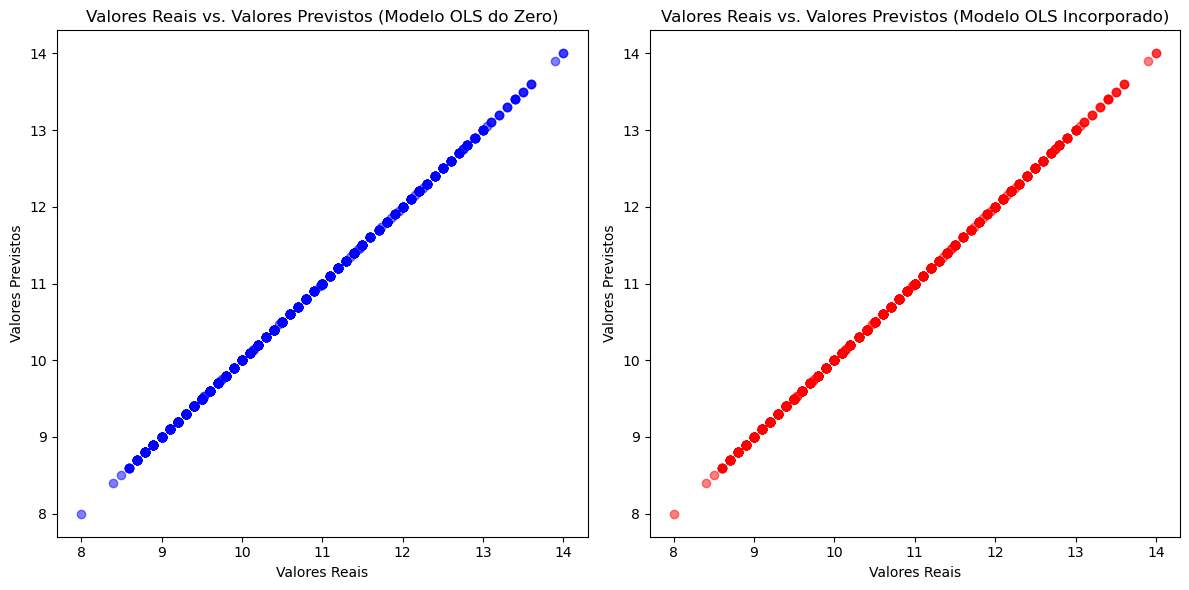

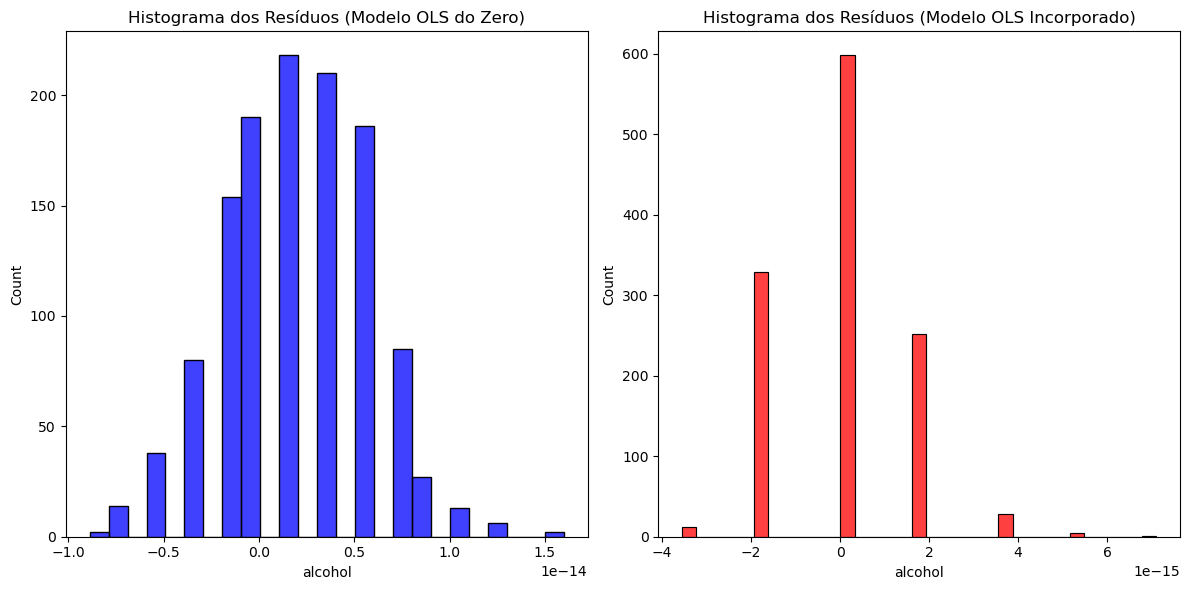

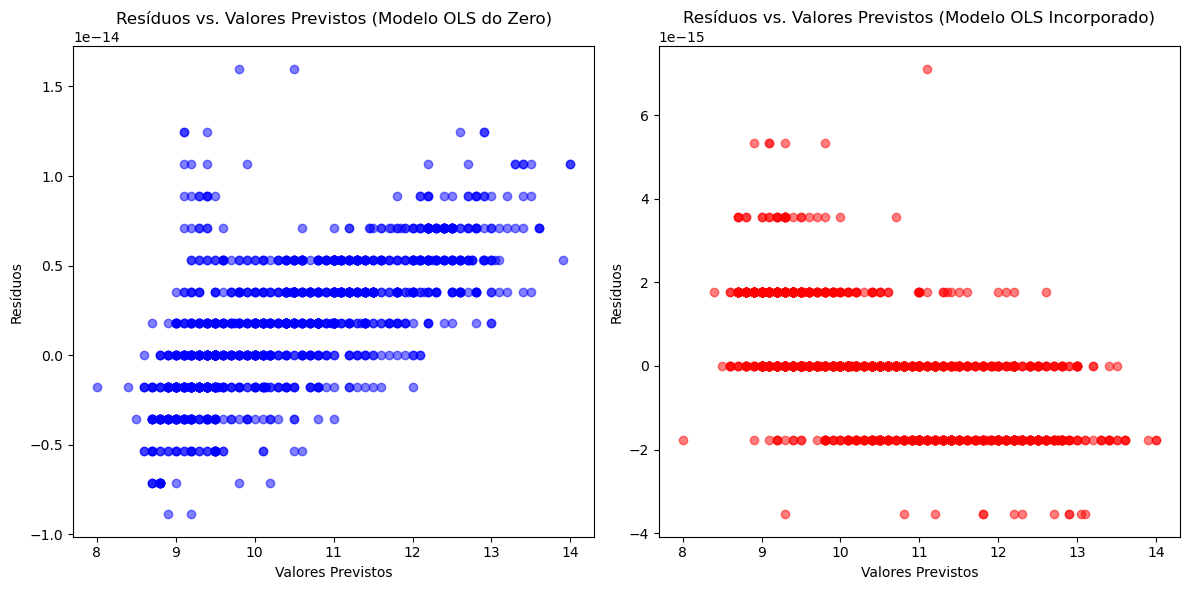

In [32]:
# Gráfico de Dispersão: Valores Reais vs. Valores Previstos (Modelo OLS do Zero)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(teste['alcohol'], previsoes_ols, color='blue', alpha=0.5)
plt.title('Valores Reais vs. Valores Previstos (Modelo OLS do Zero)')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

# Gráfico de Dispersão: Valores Reais vs. Valores Previstos (Modelo OLS Incorporado)
plt.subplot(1, 2, 2)
plt.scatter(teste['alcohol'], previsoes, color='red', alpha=0.5)
plt.title('Valores Reais vs. Valores Previstos (Modelo OLS Incorporado)')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

plt.tight_layout()
plt.show()

# Histograma dos Resíduos (Modelo OLS do Zero)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
residuos_zero = teste['alcohol'] - previsoes_ols
sns.histplot(residuos_zero, color='blue')
plt.title('Histograma dos Resíduos (Modelo OLS do Zero)')

# Histograma dos Resíduos (Modelo OLS Incorporado)
plt.subplot(1, 2, 2)
residuos_incorporado = teste['alcohol'] - previsoes
sns.histplot(residuos_incorporado, color='red')
plt.title('Histograma dos Resíduos (Modelo OLS Incorporado)')

plt.tight_layout()
plt.show()

# Resíduos vs. Valores Previstos (Modelo OLS Incorporado)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(previsoes_ols, residuos_zero, color='blue', alpha=0.5)
plt.title('Resíduos vs. Valores Previstos (Modelo OLS do Zero)')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')

# Resíduos vs. Valores Previstos (Modelo OLS Incorporado)
plt.subplot(1, 2, 2)
plt.scatter(previsoes, residuos_incorporado, color='red', alpha=0.5)
plt.title('Resíduos vs. Valores Previstos (Modelo OLS Incorporado)')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')

plt.tight_layout()
plt.show()